In [1]:
from definir_coupe import *
from definir_cycle import *
%matplotlib widget 
import matplotlib
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/MIP_constraints/Python/")
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem")
from _3DLoops._3dpu_using_dfs import *
import nibabel as nb
ROOT = "../"
from CreatingCycles import *

In [2]:
ROOT = '..'
file_path = '/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/Results/ph_loops.pkl'

# Read the pickle file
with open(file_path, "rb") as file:
    data = pickle.load(file)

In [3]:
cycle1 = data.cycles[0]
cycle1 = [data.mapping[i] for i in cycle1]
cycle1 = cycle1 + [cycle1[0]]

In [4]:
Ref_cycle = Refine_cycle(cycle1)
Ref_cycle.squares[0]
new_graph = Ref_cycle.new_graph()

100%|██████████| 180/180 [00:00<00:00, 139063.31it/s]

In [5]:
new_graph.edges

EdgeView([((1.0, 0.5, 26.0), (1.0, 1.0, 26.5)), ((1.0, 0.5, 26.0), (1.0, 0.5, 25.0)), ((1.0, 0.5, 26.0), (2.0, 0.5, 26.0)), ((1.0, 0.5, 26.0), (1.0, 0.5, 27.0)), ((1.0, 0.5, 26.0), (0.0, 0.5, 26.0)), ((1.0, 0.5, 26.0), (1.0, 1.0, 25.5)), ((1.0, 0.5, 26.0), (0.5, 1.0, 26.0)), ((1.0, 0.5, 26.0), (1.0, 0.0, 26.5)), ((1.0, 0.5, 26.0), (1.0, 0.0, 25.5)), ((1.0, 0.5, 26.0), (0.5, 0.0, 26.0)), ((1.0, 1.0, 26.5), (0.5, 1.0, 27.0)), ((1.0, 1.0, 26.5), (1.0, 0.5, 27.0)), ((1.0, 1.0, 26.5), (1.0, 1.5, 27.0)), ((1.0, 1.0, 26.5), (0.5, 1.0, 26.0)), ((1.0, 1.0, 26.5), (1.0, 0.0, 26.5)), ((1.0, 1.0, 26.5), (1.5, 1.0, 27.0)), ((1.0, 0.5, 25.0), (2.0, 0.5, 25.0)), ((1.0, 0.5, 25.0), (1.0, 1.0, 25.5)), ((1.0, 0.5, 25.0), (1.0, 1.0, 24.5)), ((1.0, 0.5, 25.0), (1.0, 0.0, 25.5)), ((1.0, 0.5, 25.0), (0.5, 1.0, 25.0)), ((2.0, 0.5, 26.0), (2.0, 0.5, 25.0)), ((2.0, 0.5, 26.0), (2.0, 1.0, 25.5)), ((2.0, 0.5, 26.0), (2.0, 0.0, 25.5)), ((2.0, 0.5, 26.0), (2.0, 0.5, 27.0)), ((1.0, 0.5, 27.0), (1.0, 1.0, 27.5)), ((

In [6]:
squares = transform_to_squares(cycle1)


NameError: name 'transform_to_squares' is not defined

100%|██████████| 144/144 [00:00<00:00, 150618.40it/s]

1


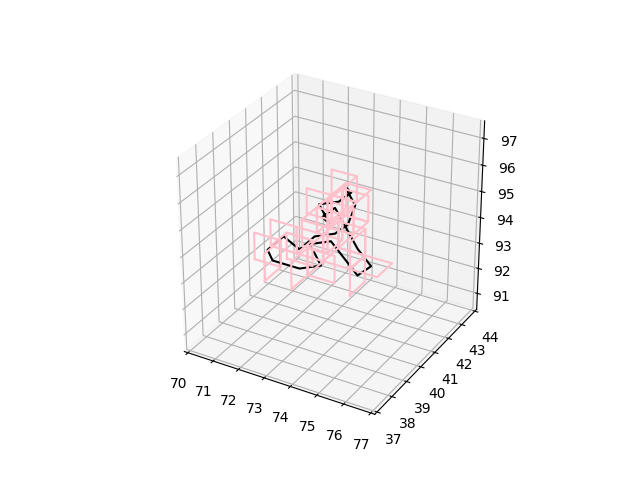

In [507]:
# import networkx as nx
cycle1 = data.cycles[np.random.randint(0,len(data.cycles))]
cycle1 = [data.mapping[i] for i in cycle1]
cycle1 = cycle1 + [cycle1[0]]


Ref_cycle = Refine_cycle(cycle1)
squares = Ref_cycle.squares



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X = []
Y = []
Z = []


for square in squares:
    a1,a2,a3,a4,_ = square
    x = (a1[0] + a2[0] + a3[0] + a4[0])/4
    y = (a1[1] + a2[1] + a3[1] + a4[1])/4
    z = (a1[2] + a2[2] + a3[2] + a4[2])/4
    X.append(x)
    Y.append(y)
    Z.append(z)
ax.plot(X,Y,Z, c='black')

for square in squares:
    a1,a2,a3,a4,_ = square  
    M = [a1[0],a2[0],a3[0],a4[0],a1[0]]
    N = [a1[1],a2[1],a3[1],a4[1],a1[1]]
    P = [a1[2],a2[2],a3[2],a4[2],a1[2]]
    ax.plot(M,N,P, c='pink')

new_graph= creation_one_graph(Ref_cycle,squares)
print(len(list(nx.connected_components(new_graph))))
shortest_component = min(nx.connected_components(new_graph), key=len)
longest_cycle = max(nx.cycle_basis(new_graph), key=len)

Wrong_nodes = [node for node in new_graph.nodes() if nx.degree(new_graph,node) == 1]
# for edge in new_graph.edges:
#     a1,a2 = edge
#     if a1 in shortest_component and a2 in shortest_component:
#         ax.plot([a1[0],a2[0]],[a1[1],a2[1]],[a1[2],a2[2]], c='red')



    


for node in Wrong_nodes:
    ax.scatter(node[0],node[1],node[2], c='green')
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 + 0.5
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

In [345]:
def denoeuder(cycle):
    Ref_cycle = Refine_cycle(cycle)
    squares = Ref_cycle.squares
    nodes = Ref_cycle.get_nodes_from_square(squares)
    

In [439]:
def edges_of_square(square):
    L = []
    for i in range(4):
        p1 = square[i]
        p2 = square[(i+1)%4]
        if (p1) < (p2):
            L.append((p1,p2))
        else:
            L.append((p2,p1))
    return L
        

def lier_les_edges_common(self,square1,square2):
    edges1 = edges_of_square(square1)
    edges2 = edges_of_square(square2)
    assert len(set(edges1).intersection(set(edges2))) == 1
    common_edge = set(edges1).intersection(set(edges2))
    edges1.remove(list(common_edge)[0])
    edges2.remove(list(common_edge)[0])
    couples = [(list(common_edge)[0],list(common_edge)[0])]
    coupled1 = set(list(common_edge))
    coupled2 = set(list(common_edge))
    for e1 in edges1:
        for e2 in edges2:
            if self.in_same_square_here(e1,e2):
                couples.append((e1,e2))
                coupled1.add(e1)
                coupled2.add(e2)
    assert len(couples) == 3,couples
    left_edge_1 = [e1 for e1 in edges1 if e1 not in coupled1]
    left_edge_2 = [e2 for e2 in edges2 if e2 not in coupled2]
    
    assert len(left_edge_1) == 1
    assert len(left_edge_2) == 1
    couples.append((left_edge_1[0],left_edge_2[0]))
    return couples

def lier_edges_non_common(self,square1,square2):
    edges1 = edges_of_square(square1)
    edges2 = edges_of_square(square2)
    couples = []
    for e1 in edges1:
        for e2 in edges2:
            if self.in_same_square_here(e1,e2):
                couples.append((e1,e2))
    assert len(couples) == 4
    return couples

def lier_edges(self,squares):
    couples = []
    for i in range(len(squares)-1):
        square1 = squares[i]
        square2 = squares[i+1]
        edges1 = edges_of_square(square1)
        edges2 = edges_of_square(square2)
        common_edge = set(edges1).intersection(set(edges2))
        if len(common_edge) == 1:
            new_set_couples = (lier_les_edges_common(self,square1,square2))
        else:
            new_set_couples = (lier_edges_non_common(self,square1,square2))
        couples += new_set_couples
    return couples

def separate_couples(self,couples):
    l1,l2,l3,l4 = couples[0]
    Linked_couples_1 = [l1]
    Linked_couples_2 = [l2]
    Linked_couples_3 = [l3]
    Linked_couples_4 = [l4]
    def ont_intersection_non_vide(set1, set2):
        return not set1.isdisjoint(set2)
    for couple in couples:
        last1,last2,last3,last4 = Linked_couples_1[-1],Linked_couples_2[-1],Linked_couples_3[-1],Linked_couples_4[-1]
        for c in couple:
            if ont_intersection_non_vide(set(c),set(last1)):
                Linked_couples_1.append(c)
            elif ont_intersection_non_vide(set(c),set(last2)):
                Linked_couples_2.append(c)
            elif ont_intersection_non_vide(set(c),set(last3)):
                Linked_couples_3.append(c)
            elif ont_intersection_non_vide(set(c),set(last4)):
                Linked_couples_4.append(c)
    return Linked_couples_1,Linked_couples_2,Linked_couples_3,Linked_couples_4

def creation_one_graph(self,squares):
    couples = lier_edges(self,squares)
    new_graph = nx.Graph()
    
    for couple in couples:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph.add_edge(tuple(n1),tuple(n2))
    return new_graph

def creation_of_graph(self,squares):
    couples = lier_edges(self,squares)
    new_graph1,new_graph2,new_graph3,new_graph4 = nx.Graph(),nx.Graph(),nx.Graph(),nx.Graph()
    L1,L2,L3,L4 = separate_couples(self,couples)
    for couple in L1:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph1.add_edge(tuple(n1),tuple(n2))
    for couple in L2:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph2.add_edge(tuple(n1),tuple(n2))
    for couple in L3:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph3.add_edge(tuple(n1),tuple(n2))
    for couple in L4:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph4.add_edge(tuple(n1),tuple(n2))
    return new_graph1,new_graph2,new_graph3,new_graph4


In [307]:
def denoeuder(cycle):
    

(((185, 193, 17), (185, 194, 17)), ((185, 193, 17), (185, 194, 17)))

In [310]:
l1,l2,l3,l4 = couples[0]
Linked_couples_1 = [l1]
Linked_couples_2 = [l2]
Linked_couples_3 = [l3]
Linked_couples_4 = [l4]
def ont_intersection_non_vide(set1, set2):
    return not set1.isdisjoint(set2)
for couple in couples:
    c1,c2,c3,c4 = couple
    last1,last2,last3,last4 = Linked_couples_1[-1],Linked_couples_2[-1],Linked_couples_3[-1],Linked_couples_4[-1]
    for c in couple:
        if ont_intersection_non_vide(set(c),set(last1)):
            Linked_couples_1.append(c)
        elif ont_intersection_non_vide(set(c),set(last2)):
            Linked_couples_2.append(c)
        elif ont_intersection_non_vide(set(c),set(last3)):
            Linked_couples_3.append(c)
        elif ont_intersection_non_vide(set(c),set(last4)):
            Linked_couples_4.append(c)





In [312]:
len(set(Linked_couples_1)),len(set(Linked_couples_2)),len(set(Linked_couples_3)),len(set(Linked_couples_4)) 

(8, 10, 10, 9)